# NASA AI: Radiation Exposure Prediction for Astronauts

Group: AnM
1. Maira Tanweer Chachar
2. Ahad Maredia

## Description:
Build an AI to predict radiation exposure levels for astronauts based on numerical data from space weather (e.g., solar activity, cosmic ray flux).
## Data:
Use NASA’s space weather datasets.
## AI Approach:
1. Use Neural Network
2. Use regression models (e.g., Linear Regression, XGBoost) to predict radiation levels from input variables like solar flare intensity.

## Output:
Numerical radiation dose predictions and safety thresholds.

## Set-Up Instructions:
1. Default Google Colab settings
2. Min 8GB Ram required

## Reading The DataSet

In [35]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [36]:
# Dataset
df= pd.read_csv("DataSet1.csv")

## Data Cleaning

In [37]:
# Removing rows with null values
df.dropna(inplace=True)


In [38]:
# Outlier Removal
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

In [39]:
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
df_clean = remove_outliers_iqr(df.copy(), numerical_cols)

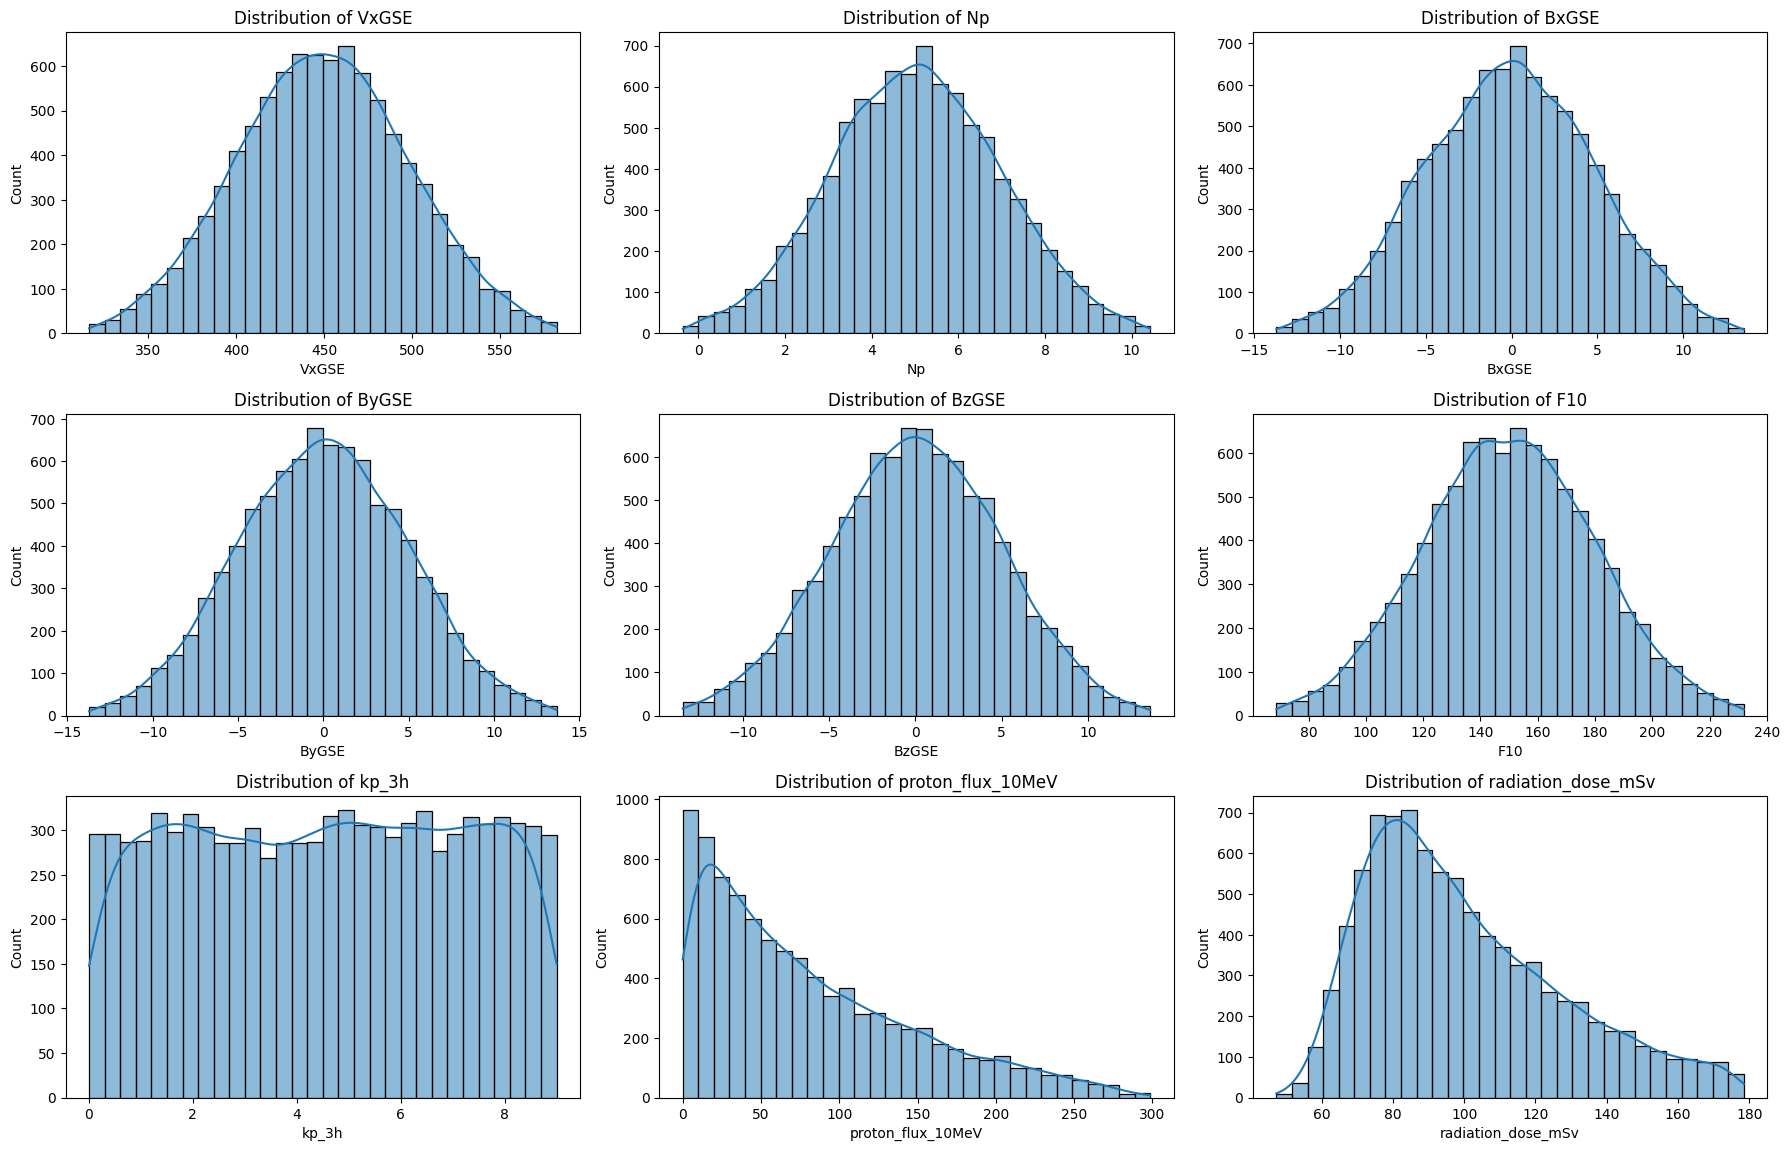

In [40]:
#Distribution
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df_clean[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [41]:
# Normalising Dataset
scaler = MinMaxScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

In [42]:
# Save Cleaned Data
df_clean.to_excel("Cleaned_Data.xlsx", index=False)

In [43]:
df=df_clean

In [44]:
df = pd.read_excel("Cleaned_Data.xlsx")

## Model/s

In [45]:
# Libraries and Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [46]:
X = df.drop(columns=["radiation_dose_mSv"])
y = df["radiation_dose_mSv"]


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Neural Network

In [48]:
#Scale input features
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)



In [49]:
#Scale target variable (optional but helpful if target values are large)
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.to_numpy().reshape(-1, 1)).flatten()

In [50]:
#Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),  # helps prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # regression output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

In [52]:
# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [53]:
# Train the model
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0735 - val_loss: 0.0079
Epoch 2/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0138 - val_loss: 0.0047
Epoch 3/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0082 - val_loss: 0.0033
Epoch 4/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0062 - val_loss: 0.0030
Epoch 5/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0049 - val_loss: 0.0023
Epoch 6/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0044 - val_loss: 0.0025
Epoch 7/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 8/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 9/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 10/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 11/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 12/200
180/180 ━━━━━━━━━━━━━━━━━━━

In [54]:
nn_preds_train_scaled = model.predict(X_train_scaled).flatten()
nn_preds_test_scaled = model.predict(X_test_scaled).flatten()

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [55]:
# Predict and inverse transform
nn_preds_train = y_scaler.inverse_transform(nn_preds_train_scaled.reshape(-1, 1)).flatten()
nn_preds_test = y_scaler.inverse_transform(nn_preds_test_scaled.reshape(-1, 1)).flatten()
y_train_original = y_scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()


In [56]:
# Evaluation
nn_mse_train = mean_squared_error(y_train_original, nn_preds_train)
nn_mse_test = mean_squared_error(y_test_original, nn_preds_test)
nn_r2_train = r2_score(y_train_original, nn_preds_train)
nn_r2_test = r2_score(y_test_original, nn_preds_test)

print("Neural Network:")
print(f"  Train - MSE: {nn_mse_train:.2f}, R²: {nn_r2_train:.4f}")
print(f"  Test  - MSE: {nn_mse_test:.2f}, R²: {nn_r2_test:.4f}")

Neural Network:
  Train - MSE: 0.00, R²: 0.9665
  Test  - MSE: 0.00, R²: 0.9628


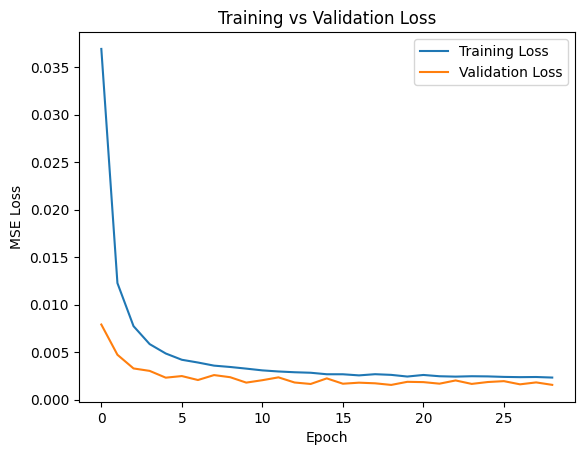

In [57]:
# Plotting Loss Function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

## Regression Models

In [59]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Bayesian Ridge": BayesianRidge(),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

In [60]:
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []
model_names = []

for name, model in models.items():
    model.fit(X_train, y_train)


    preds_train = model.predict(X_train)
    preds_test = model.predict(X_test)


    mse_train = mean_squared_error(y_train, preds_train)
    mse_test = mean_squared_error(y_test, preds_test)
    r2_train = r2_score(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)


    model_names.append(name)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

    print(f"{name}:")
    print(f"  Train - MSE: {mse_train:.2f}, R²: {r2_train:.4f}")
    print(f"  Test  - MSE: {mse_test:.2f}, R²: {r2_test:.4f}")

Linear Regression:
  Train - MSE: 0.00, R²: 0.9668
  Test  - MSE: 0.00, R²: 0.9649
Ridge Regression:
  Train - MSE: 0.00, R²: 0.9668
  Test  - MSE: 0.00, R²: 0.9650
Lasso Regression:
  Train - MSE: 0.04, R²: 0.0000
  Test  - MSE: 0.04, R²: -0.0000
Random Forest:
  Train - MSE: 0.00, R²: 0.9946
  Test  - MSE: 0.00, R²: 0.9616
Bayesian Ridge:
  Train - MSE: 0.00, R²: 0.9668
  Test  - MSE: 0.00, R²: 0.9649
XGBoost:
  Train - MSE: 0.00, R²: 0.9906
  Test  - MSE: 0.00, R²: 0.9592


In [62]:
# Documenting NN for comparison
model_names.append("Neural Network")
mse_train_list.append(nn_mse_train)
mse_test_list.append(nn_mse_test)
r2_train_list.append(nn_r2_train)
r2_test_list.append(nn_r2_test)

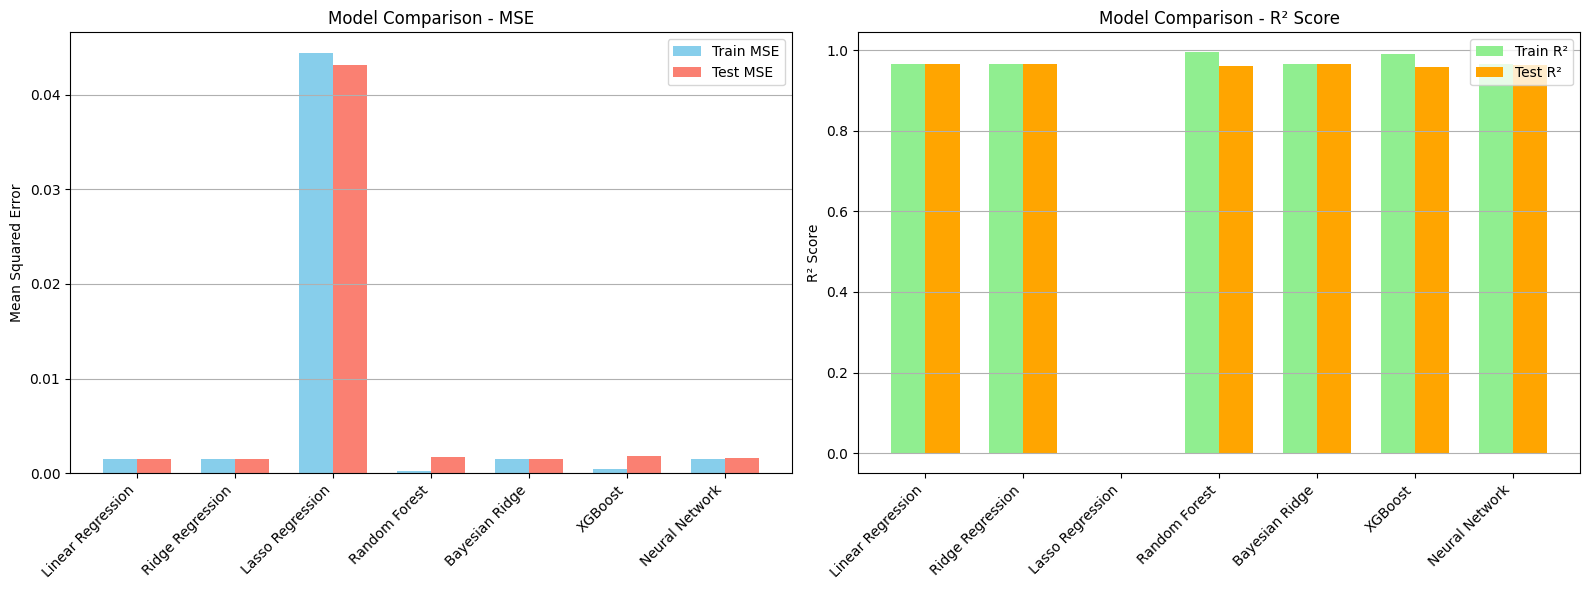

In [63]:
# Plotting Comparisons
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# MSE Comparison
ax[0].bar(x - width/2, mse_train_list, width, label='Train MSE', color='skyblue')
ax[0].bar(x + width/2, mse_test_list, width, label='Test MSE', color='salmon')
ax[0].set_title('Model Comparison - MSE')
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_names, rotation=45, ha='right')
ax[0].set_ylabel('Mean Squared Error')
ax[0].legend()
ax[0].grid(axis='y')

# R² Comparison
ax[1].bar(x - width/2, r2_train_list, width, label='Train R²', color='lightgreen')
ax[1].bar(x + width/2, r2_test_list, width, label='Test R²', color='orange')
ax[1].set_title('Model Comparison - R² Score')
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_names, rotation=45, ha='right')
ax[1].set_ylabel('R² Score')
ax[1].legend()
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()
